<a href="https://colab.research.google.com/github/RodolfoFigueroa/madi2022-1/blob/main/Unidad_1/2_Recursion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

En esta sesión veremos algunos ejemplos clásicos donde las recursiones juegan un papel muy importante.

# Sucesión de Fibonacci

Es de las mas famosas dentro de las sucesiones definidas recursivamente. Los términos de la sucesión se definen por:

\begin{align}
F_0 = 0,\ F_1 = 1\\
F_n = F_{n-1} + F_{n-2}
\end{align}

Veamos algunos ejemplos relacionados con esta sucesión.

## Ejemplo 1

**Muestra que cualesquiera dos números consecutivos en la sucesión de Fibonacci son primos relativos.**

---

Probaremos por inducción que para todo entero positivo $n$, se cumple:

$$(F_n, F_{n-1}) = 1$$

donde $(x,y)$ es el máximo común divisor de $x$ y $y$.

**Demostración:**

* Caso base: Claramente:

$$(0, 1) = 1$$

* Hipótesis de inducción: 

$$(F_k, F_{k-1}) = 1$$

* Paso inductivo: Usando que $(a,b) = (a-b, b)$ Notemos que 

\begin{align}
(F_{k+1}, F_k) &= (F_{k+1} - F_k, F_k) \\
&= (F_{k-1}, F_k) \\
&= 1
\end{align}
Lo último por nuestra hipótesis de inducción. 

Concluimos que en efecto, $(F_n, F_{n-1}) = 1$ para todo entero positivo $n$.

## Ejemplo 2 

**Encuentra el residuo de $F_{100005}$ al ser dividido entre $23$.**

---

Como cada término depende únicamente de los dos anteriores, al considerar la sucesión dada por los residuos de la de Fibonacci, hay $23 \cdot 23$ parejas posibles de residuos módulo $23$. Por lo tanto, la sucesión de los residuos se va a ciclar a partir de cierto momento (queda como ejercicio probar que esta sucesión se cicla desde el principio). 

Encontrar la longitud del periodo de esta secuencia nos será útil para resolver este problema, pues si el periodo es $p$ únicamente restaría encontrar el residuo de $100005$ módulo $p$.

Encontremos entonces el periodo de la sucesión de los residuos módulo $23$.

In [3]:
# 0, 1,    1,    2,   3,    5,   8, ....
# 0  1  (1, 1)           
res = [0, 1]  # Inicializamos con los residuos por defecto de 0 y 1
cur = (1, 1)  # (fn-1, fn) <-> (1, (0 + 1) % 23)

print(res)
print(cur)
while cur != (1,0): 
    res.append(cur[1])
    cur = (cur[1], (cur[0] + cur[1])%23)
    print(res)
    print(cur)

len(res)

[0, 1]
(1, 1)
[0, 1, 1]
(1, 2)
[0, 1, 1, 2]
(2, 3)
[0, 1, 1, 2, 3]
(3, 5)
[0, 1, 1, 2, 3, 5]
(5, 8)
[0, 1, 1, 2, 3, 5, 8]
(8, 13)
[0, 1, 1, 2, 3, 5, 8, 13]
(13, 21)
[0, 1, 1, 2, 3, 5, 8, 13, 21]
(21, 11)
[0, 1, 1, 2, 3, 5, 8, 13, 21, 11]
(11, 9)
[0, 1, 1, 2, 3, 5, 8, 13, 21, 11, 9]
(9, 20)
[0, 1, 1, 2, 3, 5, 8, 13, 21, 11, 9, 20]
(20, 6)
[0, 1, 1, 2, 3, 5, 8, 13, 21, 11, 9, 20, 6]
(6, 3)
[0, 1, 1, 2, 3, 5, 8, 13, 21, 11, 9, 20, 6, 3]
(3, 9)
[0, 1, 1, 2, 3, 5, 8, 13, 21, 11, 9, 20, 6, 3, 9]
(9, 12)
[0, 1, 1, 2, 3, 5, 8, 13, 21, 11, 9, 20, 6, 3, 9, 12]
(12, 21)
[0, 1, 1, 2, 3, 5, 8, 13, 21, 11, 9, 20, 6, 3, 9, 12, 21]
(21, 10)
[0, 1, 1, 2, 3, 5, 8, 13, 21, 11, 9, 20, 6, 3, 9, 12, 21, 10]
(10, 8)
[0, 1, 1, 2, 3, 5, 8, 13, 21, 11, 9, 20, 6, 3, 9, 12, 21, 10, 8]
(8, 18)
[0, 1, 1, 2, 3, 5, 8, 13, 21, 11, 9, 20, 6, 3, 9, 12, 21, 10, 8, 18]
(18, 3)
[0, 1, 1, 2, 3, 5, 8, 13, 21, 11, 9, 20, 6, 3, 9, 12, 21, 10, 8, 18, 3]
(3, 21)
[0, 1, 1, 2, 3, 5, 8, 13, 21, 11, 9, 20, 6, 3, 9, 12, 21, 10, 8, 18

48

In [4]:
res = [0, 1]
cur = (1, 1)  

for _ in range(53):
    res.append(cur[1])
    cur = (cur[1], (cur[0] + cur[1])%23)
print(res)
print(cur)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 11, 9, 20, 6, 3, 9, 12, 21, 10, 8, 18, 3, 21, 1, 22, 0, 22, 22, 21, 20, 18, 15, 10, 2, 12, 14, 3, 17, 20, 14, 11, 2, 13, 15, 5, 20, 2, 22, 1, 0, 1, 1, 2, 3, 5, 8]
(8, 13)


Ahora solo resta encontrar el residuo de $100005$ módulo $48$, y tomar el respectivo residuo de la sucesión. 

In [31]:
print("El residuo del 100005-ésimo número de Fibonacci módulo 23 es:", res[100005 % 48])

El residuo del 100005-ésimo número de Fibonacci módulo 23 es: 21


# Torres de Hanoi

Consideremos el problema de las torres de Hanoi con $n$ discos:

Se tienen $n$ discos de distintos tamaños y tres postes verticales donde se pueden poner estos discos. Inicialmente, se tienen todos los discos en el primer poste ordenados del más chico al más grande, con el más grande en la base. En cada paso se puede mover un disco que se encuentre hasta arriba de algún poste a cualquier otro poste siempre y cuando se coloque en un poste vacío o sobre un disco de mayor tamaño. Determina la menor cantidad de pasos necesarios para mover todos los discos del primer poste al tercero.

Veamos qué pasa cuando $n$ es chico. 

Se puede jugar en https://www.mathsisfun.com/games/towerofhanoi.html

* Si $n = 1$ es evidente que en un movimiento podemos lograr lo deseado.  

* Para $n = 2$, para poder poner el disco más grande en el tercer poste necesitamos que el disco más chico esté en el segundo poste, es decir, necesitamos al menos tres movimientos, uno para mover el disco chico al segundo poste, otro para mover el grande al tercer poste, y finalmente otro para poner el disco pequeño arriba del grande. 

* Para $n = 3$, se sigue un razonamiento similar. Necesitamos que los dos discos más chicos estén en el segundo poste (por el caso anterior requerimos al menos $3$ movimientos para esto), para después mover el disco más grande al tercer poste (un movimiento), y luego poner los discos más chicos encima de éste (otros $3$ movimientos), lo que nos da un total de $7$ movimientos.

Analizando estos primeros casos, podemos llegar a la conjetura de que el mínimo número de pasos necesarios para lograr lo deseado son $2^n - 1$. Probemos esto por inducción.

* Caso base. Los mencionados anteriormente.

* Hipótesis de inducción. Para $k$ discos, el menor número de pasos necesarios para mover todos los discos al tercer poste son $2^k - 1$.

* Paso inductivo. Con $k+1$ discos. Para poder mover el disco más grande al tercer poste, es necesario que todos los demás estén en el segundo poste, lo que por hipótesis de inducción requiere al menos $2^k -1$ pasos. Posteriormente se requiere al menos un paso para mover el disco más grande al tercer poste, y para concluir, como todos los demás discos tuvieron que estar en el segundo poste, moverlos al tercero nos tomará otros $2^k - 1$ pasos. Sumando, tenemos que se necesitan al menos:

$$(2^k - 1) + 1 + (2^k - 1) = 2^{k+1} - 1$$ 

pasos para lograr pasar todos los discos al tercer poste. Notemos que este paso inductivo también nos dice cómo ir haciendo los pasos para mostrar que $2^{k+1} - 1$ es suficiente para poder llegar al estado deseado.

Concluimos que el menor número de pasos para poder pasar los $n$ discos del primer al tercer poste son $2^n - 1$.

---

Ahora, veamos cómo se puede hacer un código que resuelva este problema en la menor cantidad de pasos posible. Para esto, diseñamos el siguiente sistema para codificar el estado de los discos:

* Los postes están representados por una lista de listas $P$. $P_i$ corresponde al $i$-ésimo poste, de izquierda a derecha.

* Los $n$ discos se denotan por números desde $1$ hasta $n$, en orden ascendente en relación a su tamaño ($1$ es el más chico, $n$ el más grande).

* $P_i$ contiene los números de los discos que están en el correspondiente poste, de abajo hacia arriba. Por ejemplo, si el segundo poste tiene los discos 1, 3, y 5, $P_2 = [5,3,1]$.

In [95]:
P = [[4, 3, 2, 1], [], []]
steps = 0

def pprint(P):
    n = sum([len(l) for l in P])
    s = '|'
    for l in P:
        for x in sorted(l)[::-1]:
            s += f' {x}'
        s += (n - len(l) + 1)*'  ' + '|'
    print(s)

    
def hanoi_solve(y, a, b):
    global steps
    if y == 1:
        P[a].pop()
        P[b].append(1)
        pprint(P)
    else:
        hanoi_solve(y-1, a, 3-a-b)
        P[a].pop()
        P[b].append(y)
        steps += 1
        pprint(P)
        hanoi_solve(y-1, 3-a-b, b)
    return

hanoi_solve(4, 0, 2)

| 4 3 2    | 1        |          |
| 4 3      | 1        | 2        |
| 4 3      |          | 2 1      |
| 4        | 3        | 2 1      |
| 4 1      | 3        | 2        |
| 4 1      | 3 2      |          |
| 4        | 3 2 1    |          |
|          | 3 2 1    | 4        |
|          | 3 2      | 4 1      |
| 2        | 3        | 4 1      |
| 2 1      | 3        | 4        |
| 2 1      |          | 4 3      |
| 2        | 1        | 4 3      |
|          | 1        | 4 3 2    |
|          |          | 4 3 2 1  |


## Ejercicio 1 

(Relacionado con conjetura de Collatz) Considera la función $f : \mathbb{Z}^{+} \rightarrow \mathbb{Z}^{+}$ dada por:

$$
f(n) = \begin{cases}
\frac{n}{2} & \text{si $n$ es par}\\
3n+1 & \text{si $n$ es impar}
\end{cases}
$$

Escribe un código que permita comprobar que al iterar $f$, en algún momento llegamos al número $1$. Por ejemplo, si empezamos con $n = 6$, $f(6) = 3$, $f(3) = 10$, $f(10) = 5$, $f(5) = 16$, y $f(f(f(f(16)))) = 1$, es decir, al iterar $f$ $8$ veces llegamos a $1$. 

Calcula en cuántas iteraciones se llega al $1$ para enteros menores a $10^4$ y grafícalo.

In [103]:
# Forma iterativa
def collatz(n):
    count = 0
    while n != 1:
        count += 1
        if n & 1:
            n = 3*n + 1
        else:            
            n //= 2
    return count

n = 6
print(f'Numero de iteraciones para llegar al 1 para n=6:\t {collatz(n)} iteraciones')

Numero de iteraciones para llegar al 1 para n=6:	 8 iteraciones


In [104]:
# Forma recursiva
count_r = 0
def collatz_r(n):
    if n == 1:
        return 1
    if n & 1:
        n = 3*n + 1
    else:            
        n //= 2
    collatz(n)
    global count_r
    count_r += 1
    return count_r

collatz_r(6)

1

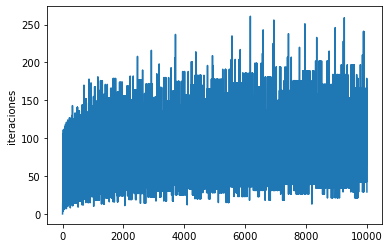

In [99]:
# Grafica para para enteros menores a  10**4

import matplotlib.pyplot as plt

axis_x = []
axis_y = []
for i in range(1, 10**4 + 1):
    axis_x.append(i)
    axis_y.append(collatz(i))
    
plt.plot(axis_x, axis_y)
plt.ylabel('iteraciones')
plt.show()

## Ejercicio 2

Encuentra el residuo de $F_{102030405060708090}$ al ser dividido por $9! = 362880$. 
  
  Nota que si se siguen exactamente los mismos pasos vistos en clase potencialmente podrían haber $(9!)^2 = 131681894400$ parejas posibles de residuos, lo que ocuparía mucho tiempo de ejecución en el programa, y computar los primeros $102030405060708090$ residuos también es costoso. 

¿Cómo optimizarlo? Hint: Recuerda el teorema chino del residuo.

---

Notemos que $9! = 2^7 \cdot 3^4 \cdot 5 \cdot 7$. El teorema chino del residuo nos permite rescatar la congruencia módulo $9!$ sabiendo las congruencias módulo $2^7, 3^4, 5$ y $7$ de manera individual. Entonces, el primer paso es escribir un programa que calcule dichas congruencias:

* $F_{102030405060708090} \pmod {2^7}$

* $F_{102030405060708090} \pmod {3^4}$

* $F_{102030405060708090} \pmod 5$

* $F_{102030405060708090} \pmod 7$


In [20]:
def concruencia(x,k):
    res = [0, 1]  
    cur = (1, 1)

    while cur != (1,0): 
        res.append(cur[1])
        cur = (cur[1], (cur[0] + cur[1])%k)    
        
    print(f"El residuo del {x}-ésimo número de Fibonacci módulo {k} es: {res[x % len(res)]}")
    

concruencia(102030405060708090,128)

concruencia(102030405060708090,81)

concruencia(102030405060708090,5)

concruencia(102030405060708090,7)


El residuo del 102030405060708090-ésimo número de Fibonacci módulo 128 es: 120
El residuo del 102030405060708090-ésimo número de Fibonacci módulo 81 es: 73
El residuo del 102030405060708090-ésimo número de Fibonacci módulo 5 es: 0
El residuo del 102030405060708090-ésimo número de Fibonacci módulo 7 es: 6


Una vez hecho esto, tendrás un sistema de la forma:

$$
\begin{align}
    x &\equiv 120 \pmod{128} \\
    x &\equiv 73 \pmod{81} \\
    x &\equiv 0 \pmod{5} \\
    x &\equiv 6 \pmod{7} 
\end{align}
$$

Puedes resolver esto usando el teorema chino del residuo. Si puedes, escribe un programa que lo implemente, aunque también lo puedes hacer a mano

In [50]:
def inv_mod(z, m):    
    # zy = 1 mod m
    y = 0
    while not ((z * y) % m == 1 % m):
        y += 1   
    return y

In [55]:
inv_mod(1683,8)

3

In [64]:
m = 128 * 81 * 5 * 7
m1, m2, m3, m4 = 128, 81, 5, 7
a1, a2, a3, a4 = 120, 73, 0, 6

z1 = m2 * m3 * m4
z2 = m1 * m3 * m4
z3 = m1 * m2 * m4
z4 = m1 * m2 * m3

y1 = inv_mod(z1, m1)
y2 = inv_mod(z2, m2)
y3 = inv_mod(z3, m3)
y4 = inv_mod(z4, m4)

w1 = y1 * z1
w2 = y2 * z2
w3 = y3 * z3
w4 = y4 * z4

x = ((a1 * w1) + (a2 * w2) + (a3 * w3) + (a4 + w4)) % m
x

165886

In [ ]:
print(f"El residuo del {102030405060708090}-ésimo número de Fibonacci módulo 362880  es: {}")

## Ejercicio 3

Muestra que al considerar la sucesión de Fibonacci módulo $n$, la sucesión obtenida se cicla desde el principio.

## Ejercicio 4

(Reto, no obligatorio). Muestra que los ciclos de menor longitud en la sucesión de Fibonacci módulo $n$ tienen $1, 2$ o $4$ ceros.

## References
http://homepages.math.uic.edu/~leon/mcs425-s08/handouts/chinese_remainder.pdf 

https://www.youtube.com/watch?v=mf51HrAfb_w&ab_channel=PaulinaPl

https://www.youtube.com/watch?v=TPbxW3aQ_3c&ab_channel=CarlosDelgado

https://www.youtube.com/watch?v=XoNLUxs09eU&ab_channel=BrianRodriguez

